In [1]:
import torch
import yaml
from hed_test import *
from attrdict import AttrDict
import matplotlib.pyplot as plt
import cv2

cfg_file = "pretrained_weights/spot/standard.yaml"
with open(cfg_file, 'r') as f:
    cfg = AttrDict( yaml.safe_load(f) )
cfg.path = cfg_file
cfg.time = "0"

hed_test = HED_test(cfg,"pretrained_weights/spot/epoch_29.pth")

#### load keypoint detector ####
from keypoint_detection import Keypoint_detector
kp_detector = Keypoint_detector(weights_path="pretrained_weights/spot/pose_cfg_test.yamlsnapshot-1030000" , 
                                config="pretrained_weights/spot/pose_cfg_test.yaml")

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
Running the weights: pretrained_weights/spot/pose_cfg_test.yamlsnapshot-1030000


/home/jingpei/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-28 15:36:17.453443: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-28 15:36:17.454744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 15:36:17.455699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had ne

In [2]:
def preprocess_img(img):
    # preprocessing the image 
    from matplotlib import cm
    
    viridis = cm.get_cmap('viridis')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    edge_img = hed_test.extract_edge(img)
    canvas = np.zeros((edge_img.shape[0],edge_img.shape[1],3))
    for i in range(edge_img.shape[0]):
        for j in range(edge_img.shape[1]):
            canvas[i,j] = viridis(edge_img[i,j])[:3]
            
    output = canvas*255
    return output.astype(np.uint8)


In [5]:
file_name = "../dataset/spot_dance/100.jpg"
img = cv2.imread(file_name)
imgScale = 0.25
newX,newY = img.shape[1]*imgScale, img.shape[0]*imgScale
resized_img = cv2.resize(img,(int(newX),int(newY)))
resized_img = preprocess_img(resized_img)

results = kp_detector.predict_single_image(resized_img)
points_predicted = results[:,:2] * (1/imgScale)
points_predicted = points_predicted.astype(int)
points_predicted = points_predicted[5:]
scores = results[:,2]
img = kp_detector.overwrite_image(img, points_predicted, scores)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1919.5, 1079.5, -0.5)

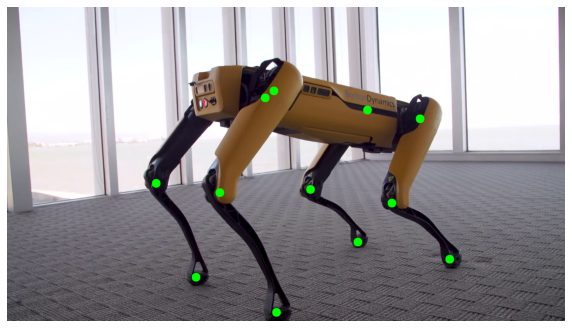

In [6]:
%matplotlib inline  
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis('off')

In [12]:
file_name = "../dataset/spot_dance/210.jpg"
img = cv2.imread(file_name)
imgScale = 0.25
newX,newY = img.shape[1]*imgScale, img.shape[0]*imgScale
resized_img = cv2.resize(img,(int(newX),int(newY)))
resized_img = preprocess_img(resized_img)

results = kp_detector.predict_single_image(resized_img)
points_predicted = results[:,:2] * (1/imgScale)
points_predicted = points_predicted.astype(int)
points_predicted = points_predicted[5:]
scores = results[:,2]
img = kp_detector.overwrite_image(img, points_predicted, scores)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1919.5, 1079.5, -0.5)

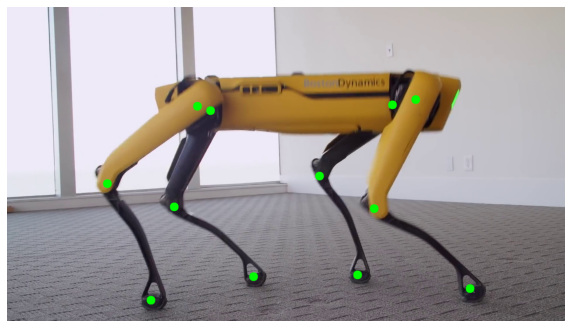

In [13]:
%matplotlib inline  
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis('off')